# SLEEP HEALTH AND LIFESTYLE ANALYSIS

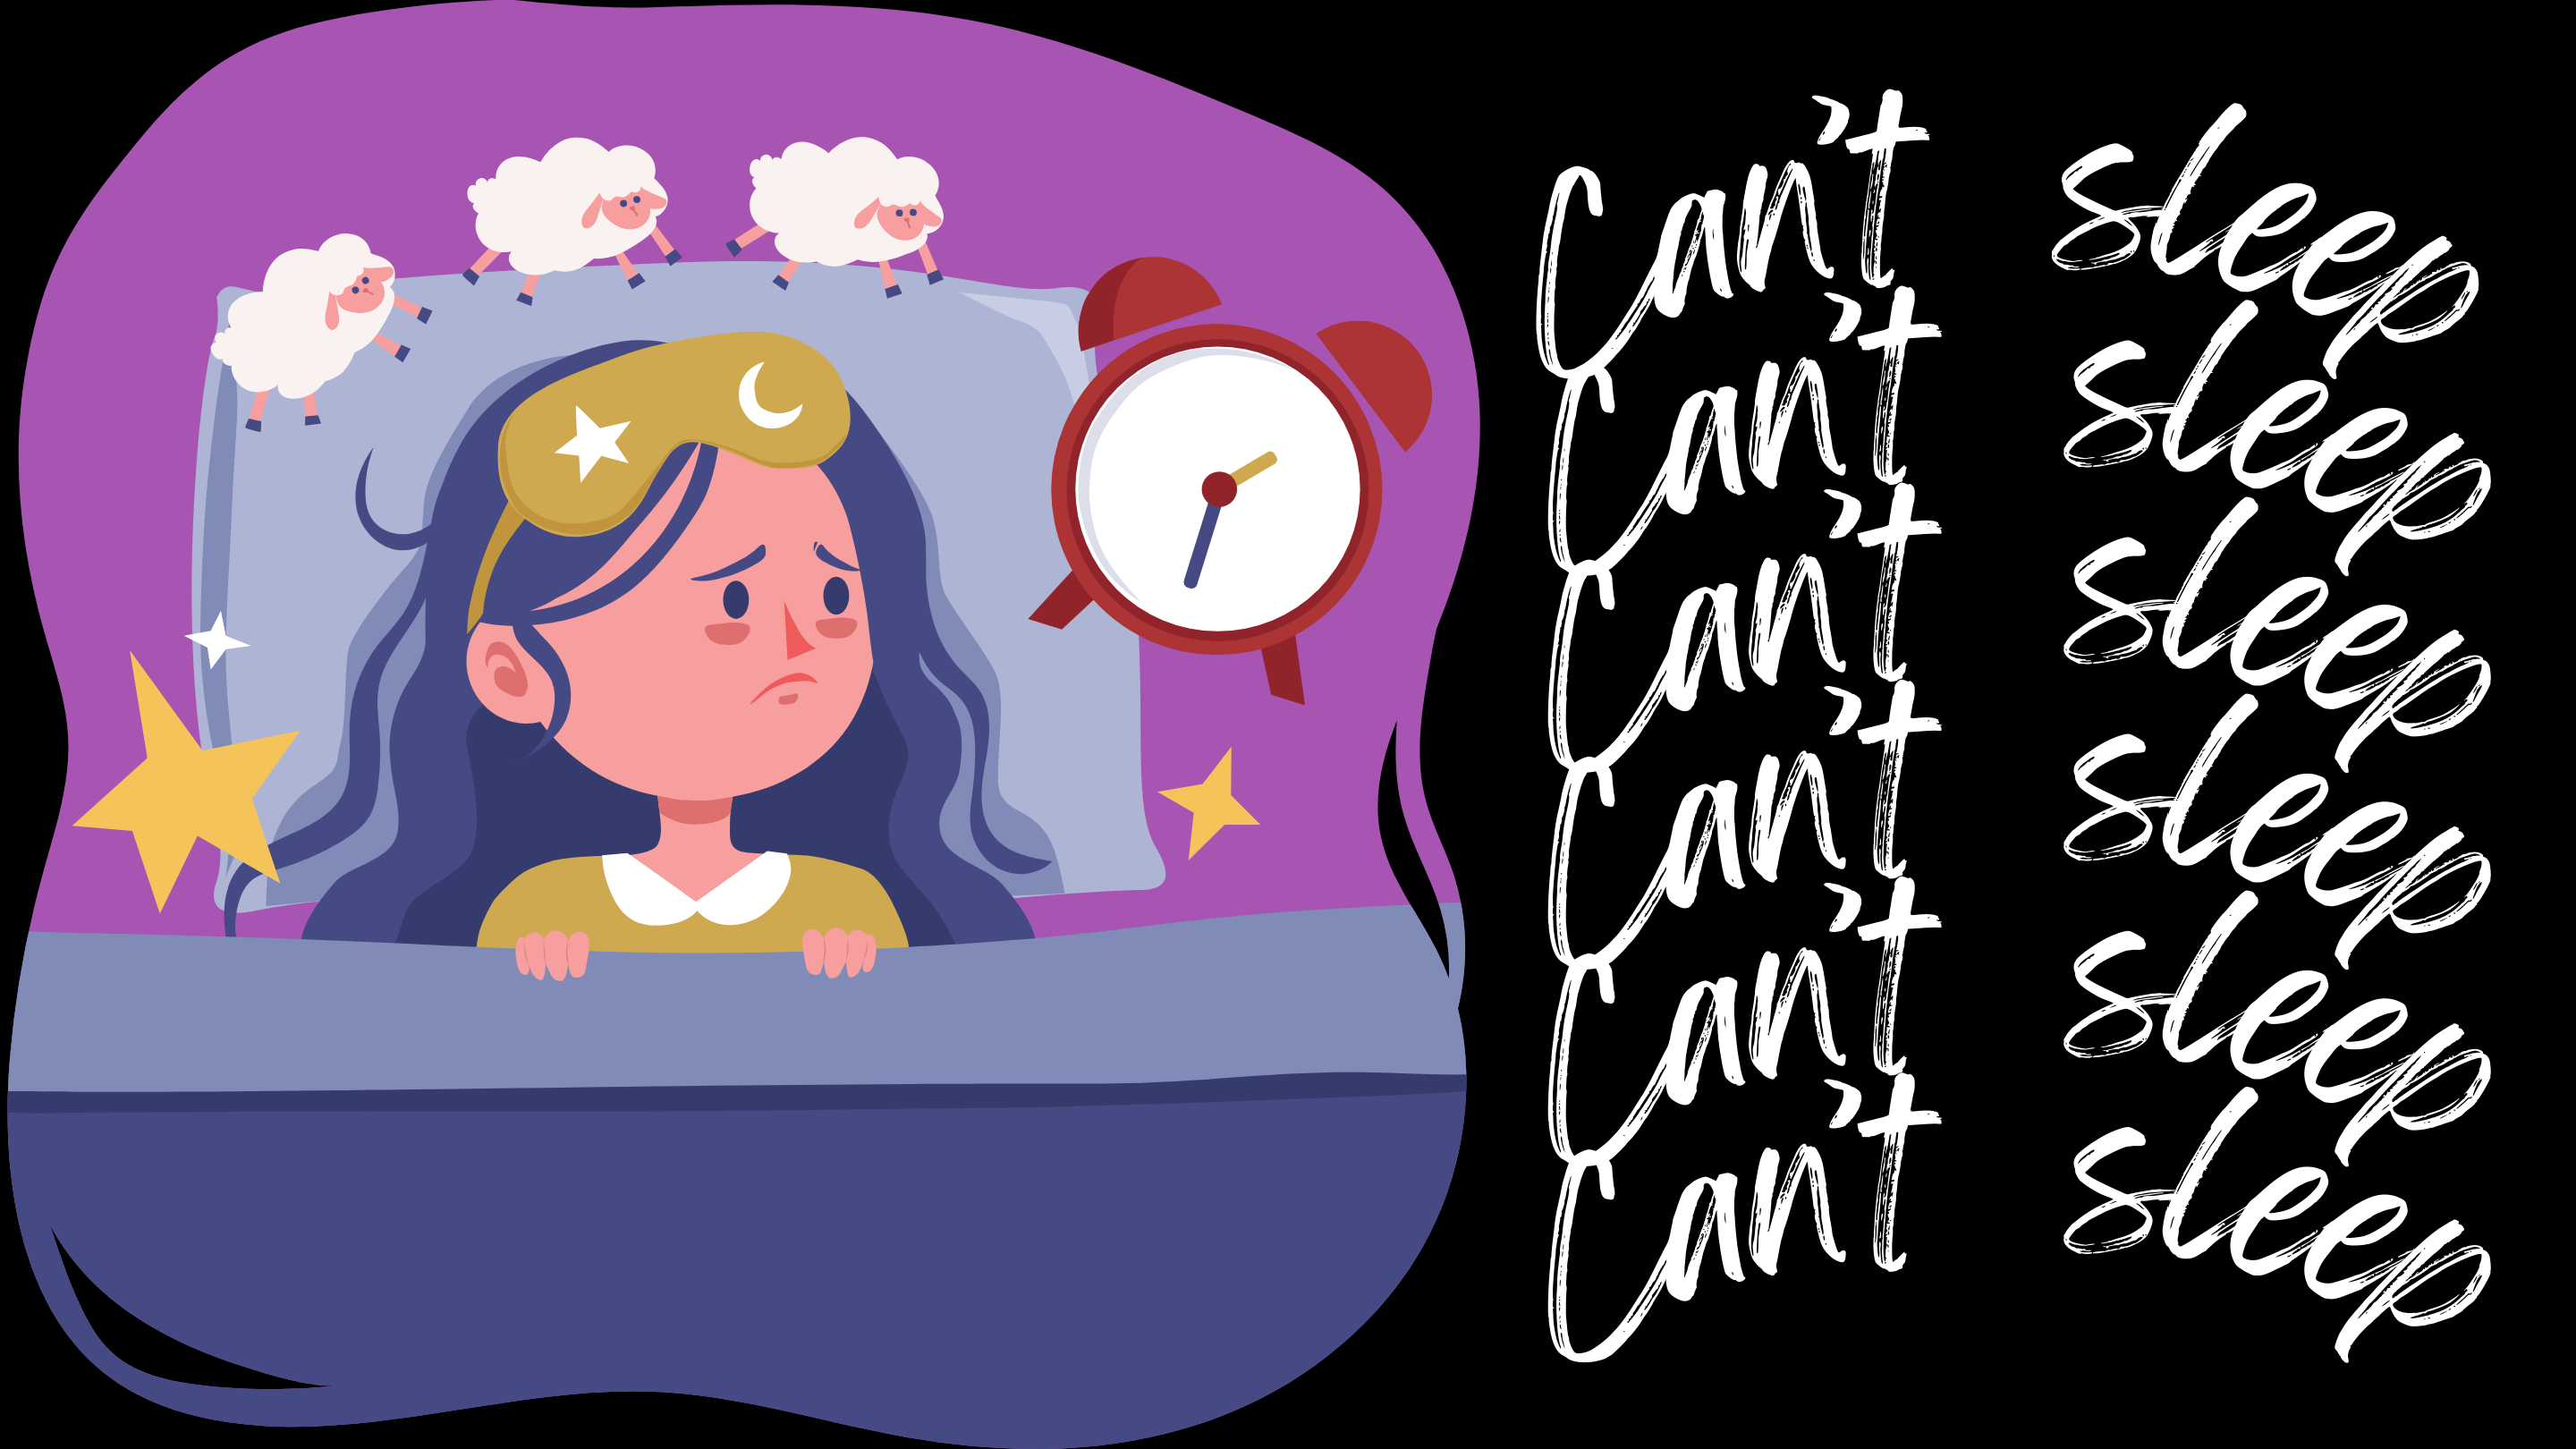


## Introduction
Sleep disorders affect a significant portion of the global population, impacting physical health, mental well-being, and overall quality of life. Understanding the factors that influence these disorders are crucial steps towards effective treatment and management.

This fictitious dataset is sourced from kaggle.com and contains close to 400 entries with 13 columns on sleep, cardiovasular, and lifestyle metrics of people. 

The columns are:

- Person ID (unique identifier for each individual)
- Gender
- Age
- Occupation
- Sleep Duration (average number of hours of sleep per day)
- Quality of Sleep (a subjective rating on a 1-10 scale)
- Physical Activity Level (average number of minutes the person engages in physical activity daily)
- Stress Level (a subjective rating on a 1-10 scale)
- BMI Category
- Blood Pressure (indicated as systolic pressure over diastolic pressure)
- Heart Rate (in beats per minute)
- Daily Steps
- Sleep Disorder (either None, Insomnia or Sleep Apnea)

### Sleep Disorder
The three categories in thee sleep disorder column are explained as follows:

None: The individual does not exhibit any specific sleep disorder.

Insomnia: The individual experiences difficulty falling asleep or staying asleep, leading to inadequate or poor-quality sleep.

Sleep Apnea: The individual suffers from pauses in breathing during sleep, resulting in disrupted sleep patterns and potential health risks.

### Research Questions
The key research questions being explored in this dataset are:

1. Which factors could contribute to a sleep disorder?

2. Does an increased physical activity level result in a better quality of sleep?

3. Does the presence of a sleep disorder affect the subjective sleep quality metric?

Let's dive in!

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset
df = pd.read_csv('sleep.csv')

### Data Understanding
The first step after loading the dataset is to understand it. What are the column data types? Do any of the columns require formatting?  Are there any missing values? Are there duplicates?

The next few lines of code explore the data to answer these questions.

In [3]:
#displaying first 5 rows
df.head()

Person ID Gender  Age            Occupation  Sleep Duration  \
0          1   Male   27     Software Engineer             6.1   
1          2   Male   28                Doctor             6.2   
2          3   Male   28                Doctor             6.2   
3          4   Male   28  Sales Representative             5.9   
4          5   Male   28  Sales Representative             5.9   

   Quality of Sleep  Physical Activity Level  Stress Level BMI Category  \
0                 6                       42             6   Overweight   
1                 6                       60             8       Normal   
2                 6                       60             8       Normal   
3                 4                       30             8        Obese   
4                 4                       30             8        Obese   

  Blood Pressure  Heart Rate  Daily Steps Sleep Disorder  
0         126/83          77         4200           None  
1         125/80          75        10000           None  
2         125/80          75        10000           None  
3         140/90          85         3000    Sleep Apnea  
4         140/90          85         3000    Sleep Apnea

In [4]:
#shape of the dataset
print('The shape of the dataset is',df.shape)

The shape of the dataset is (374, 13)


In [5]:
#checking column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           374 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [6]:
#summary statistics of numerical columns
df.describe(include= np.number)

Person ID         Age  Sleep Duration  Quality of Sleep  \
count  374.000000  374.000000      374.000000        374.000000   
mean   187.500000   42.184492        7.132086          7.312834   
std    108.108742    8.673133        0.795657          1.196956   
min      1.000000   27.000000        5.800000          4.000000   
25%     94.250000   35.250000        6.400000          6.000000   
50%    187.500000   43.000000        7.200000          7.000000   
75%    280.750000   50.000000        7.800000          8.000000   
max    374.000000   59.000000        8.500000          9.000000   

       Physical Activity Level  Stress Level  Heart Rate   Daily Steps  
count               374.000000    374.000000  374.000000    374.000000  
mean                 59.171123      5.385027   70.165775   6816.844920  
std                  20.830804      1.774526    4.135676   1617.915679  
min                  30.000000      3.000000   65.000000   3000.000000  
25%                  45.000000      4.000000   68.000000   5600.000000  
50%                  60.000000      5.000000   70.000000   7000.000000  
75%                  75.000000      7.000000   72.000000   8000.000000  
max                  90.000000      8.000000   86.000000  10000.000000

In [7]:
#summary statistics of object columns
df.describe(include = object)

Gender Occupation BMI Category Blood Pressure Sleep Disorder
count     374        374          374            374            374
unique      2         11            4             25              3
top      Male      Nurse       Normal         130/85           None
freq      189         73          195             99            219

In [8]:
#checking for duplicates
df[df.duplicated(subset='Person ID')]

Empty DataFrame
Columns: [Person ID, Gender, Age, Occupation, Sleep Duration, Quality of Sleep, Physical Activity Level, Stress Level, BMI Category, Blood Pressure, Heart Rate, Daily Steps, Sleep Disorder]
Index: []

In [9]:
#checking for unique number of entries in each column
print(df.nunique())

Person ID                  374
Gender                       2
Age                         31
Occupation                  11
Sleep Duration              27
Quality of Sleep             6
Physical Activity Level     16
Stress Level                 6
BMI Category                 4
Blood Pressure              25
Heart Rate                  19
Daily Steps                 20
Sleep Disorder               3
dtype: int64


In [10]:
#checking unique blood pressure
df['Blood Pressure'].unique()

array(['126/83', '125/80', '140/90', '120/80', '132/87', '130/86',
       '117/76', '118/76', '128/85', '131/86', '128/84', '115/75',
       '135/88', '129/84', '130/85', '115/78', '119/77', '121/79',
       '125/82', '135/90', '122/80', '142/92', '140/95', '139/91',
       '118/75'], dtype=object)

In [45]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [46]:
df['BMI Category'].unique()

array(['Overweight', 'Normal', 'Obese', 'Normal Weight'], dtype=object)

### Data Cleaning
Digging revealed that some cleaning needs to be done in the dataset before any analysis/visualization. 
These cleaning steps are:

1. Renaming columns to replace white space with underscore and change case to lower. This will make calling of columns easier.
2. The blood pressure column can be used to categorize individuals as having 'normal BP' or 'high BP'.
3. In the BMI column, 'normal' needs to be replaced with 'normal weight' since they are one category.
4. Data types must be changed. Gender, Sleep Disorder, and BMI Category should be categorical data types.

In [11]:
sleep_df = df.copy()

In [12]:
sleep_df.columns = sleep_df.columns.str.replace(' ', '_', regex=False)
sleep_df.columns = sleep_df.columns.str.lower()
sleep_df.rename(columns = {'sleep_duration':'avg_sleep_duration(hrs)',
                           'physical_activity_level':'avg_physical_activity(mins)'}, inplace=True)

In [13]:
sleep_df.columns

Index(['person_id', 'gender', 'age', 'occupation', 'avg_sleep_duration(hrs)',
       'quality_of_sleep', 'avg_physical_activity(mins)', 'stress_level',
       'bmi_category', 'blood_pressure', 'heart_rate', 'daily_steps',
       'sleep_disorder'],
      dtype='object')

In [14]:
sleep_df[['systolic', 'diastolic']] = sleep_df.blood_pressure.str.split('/',expand=True)
sleep_df['systolic'] = sleep_df['systolic'].astype('int64')
sleep_df['diastolic'] = sleep_df['diastolic'].astype('int64')
sleep_df.head()

person_id gender  age            occupation  avg_sleep_duration(hrs)  \
0          1   Male   27     Software Engineer                      6.1   
1          2   Male   28                Doctor                      6.2   
2          3   Male   28                Doctor                      6.2   
3          4   Male   28  Sales Representative                      5.9   
4          5   Male   28  Sales Representative                      5.9   

   quality_of_sleep  avg_physical_activity(mins)  stress_level bmi_category  \
0                 6                           42             6   Overweight   
1                 6                           60             8       Normal   
2                 6                           60             8       Normal   
3                 4                           30             8        Obese   
4                 4                           30             8        Obese   

  blood_pressure  heart_rate  daily_steps sleep_disorder  systolic  diastolic  
0         126/83          77         4200           None       126         83  
1         125/80          75        10000           None       125         80  
2         125/80          75        10000           None       125         80  
3         140/90          85         3000    Sleep Apnea       140         90  
4         140/90          85         3000    Sleep Apnea       140         90

In [15]:
bp_conditions = (sleep_df['systolic'] < 129) & (sleep_df['diastolic'] <= 80)

sleep_df['bp_category'] = np.where(bp_conditions, 'Normal BP', 'High BP')

sleep_df.head(20)

person_id  gender  age            occupation  avg_sleep_duration(hrs)  \
0           1    Male   27     Software Engineer                      6.1   
1           2    Male   28                Doctor                      6.2   
2           3    Male   28                Doctor                      6.2   
3           4    Male   28  Sales Representative                      5.9   
4           5    Male   28  Sales Representative                      5.9   
5           6    Male   28     Software Engineer                      5.9   
6           7    Male   29               Teacher                      6.3   
7           8    Male   29                Doctor                      7.8   
8           9    Male   29                Doctor                      7.8   
9          10    Male   29                Doctor                      7.8   
10         11    Male   29                Doctor                      6.1   
11         12    Male   29                Doctor                      7.8   
12         13    Male   29                Doctor                      6.1   
13         14    Male   29                Doctor                      6.0   
14         15    Male   29                Doctor                      6.0   
15         16    Male   29                Doctor                      6.0   
16         17  Female   29                 Nurse                      6.5   
17         18    Male   29                Doctor                      6.0   
18         19  Female   29                 Nurse                      6.5   
19         20    Male   30                Doctor                      7.6   

    quality_of_sleep  avg_physical_activity(mins)  stress_level  \
0                  6                           42             6   
1                  6                           60             8   
2                  6                           60             8   
3                  4                           30             8   
4                  4                           30             8   
5                  4                           30             8   
6                  6                           40             7   
7                  7                           75             6   
8                  7                           75             6   
9                  7                           75             6   
10                 6                           30             8   
11                 7                           75             6   
12                 6                           30             8   
13                 6                           30             8   
14                 6                           30             8   
15                 6                           30             8   
16                 5                           40             7   
17                 6                           30             8   
18                 5                           40             7   
19                 7                           75             6   

     bmi_category blood_pressure  heart_rate  daily_steps sleep_disorder  \
0      Overweight         126/83          77         4200           None   
1          Normal         125/80          75        10000           None   
2          Normal         125/80          75        10000           None   
3           Obese         140/90          85         3000    Sleep Apnea   
4           Obese         140/90          85         3000    Sleep Apnea   
5           Obese         140/90          85         3000       Insomnia   
6           Obese         140/90          82         3500       Insomnia   
7          Normal         120/80          70         8000           None   
8          Normal         120/80          70         8000           None   
9          Normal         120/80          70         8000           None   
10         Normal         120/80          70         8000           None   
11         Normal         120/80          70         8000         

In [16]:
sleep_df = sleep_df.drop(columns = ['systolic','diastolic'], axis=1)

In [17]:
bmi_category_mapping = {'Overweight':'Overweight', 'Normal':'Normal Weight','Normal Weight':'Normal Weight',
                       'Obese':'Obese'}

sleep_df['bmi_category'] = sleep_df['bmi_category'].map(bmi_category_mapping)

In [18]:
sleep_df.head()

person_id gender  age            occupation  avg_sleep_duration(hrs)  \
0          1   Male   27     Software Engineer                      6.1   
1          2   Male   28                Doctor                      6.2   
2          3   Male   28                Doctor                      6.2   
3          4   Male   28  Sales Representative                      5.9   
4          5   Male   28  Sales Representative                      5.9   

   quality_of_sleep  avg_physical_activity(mins)  stress_level   bmi_category  \
0                 6                           42             6     Overweight   
1                 6                           60             8  Normal Weight   
2                 6                           60             8  Normal Weight   
3                 4                           30             8          Obese   
4                 4                           30             8          Obese   

  blood_pressure  heart_rate  daily_steps sleep_disorder bp_category  
0         126/83          77         4200           None     High BP  
1         125/80          75        10000           None   Normal BP  
2         125/80          75        10000           None   Normal BP  
3         140/90          85         3000    Sleep Apnea     High BP  
4         140/90          85         3000    Sleep Apnea     High BP

In [19]:
sleep_df.describe(include = object)

gender occupation   bmi_category blood_pressure sleep_disorder  \
count     374        374            374            374            374   
unique      2         11              3             25              3   
top      Male      Nurse  Normal Weight         130/85           None   
freq      189         73            216             99            219   

       bp_category  
count          374  
unique           2  
top        High BP  
freq           221

In [20]:
sleep_df['gender'] = sleep_df['gender'].astype('category')
sleep_df['bmi_category'] = sleep_df['bmi_category'].astype('category')
sleep_df['sleep_disorder'] = sleep_df['sleep_disorder'].astype('category')
sleep_df['bp_category'] = sleep_df['bp_category'].astype('category')
sleep_df['person_id'] = sleep_df['person_id'].astype('object')

In [21]:
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   person_id                    374 non-null    object  
 1   gender                       374 non-null    category
 2   age                          374 non-null    int64   
 3   occupation                   374 non-null    object  
 4   avg_sleep_duration(hrs)      374 non-null    float64 
 5   quality_of_sleep             374 non-null    int64   
 6   avg_physical_activity(mins)  374 non-null    int64   
 7   stress_level                 374 non-null    int64   
 8   bmi_category                 374 non-null    category
 9   blood_pressure               374 non-null    object  
 10  heart_rate                   374 non-null    int64   
 11  daily_steps                  374 non-null    int64   
 12  sleep_disorder               374 non-null    category
 13  bp_ca

In [22]:
sleep_df.to_csv('clean_sleep_data.csv', index=False)

#### Yaaayy!
The data is now clean and ready for visualization.

### Data Visualization

Text(0.5, 1.0, 'Sleep Disorder Distribution')

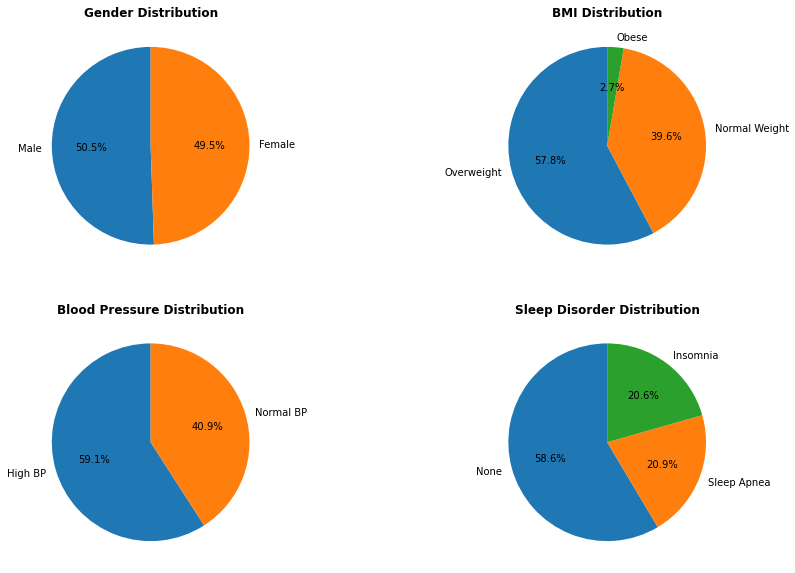

In [23]:
#pie charts for category proportions

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
labels = list(sleep_df['gender'].unique())
plt.pie(x =sleep_df['gender'].value_counts(),autopct = '%.1f%%', labels = labels, startangle = 90)
plt.title('Gender Distribution', fontweight= 'bold')

plt.subplot(2, 2, 2)
labels = list(sleep_df['bmi_category'].unique())
plt.pie(x =sleep_df['bmi_category'].value_counts(),autopct = '%.1f%%', labels = labels, startangle = 90)
plt.title('BMI Distribution', fontweight= 'bold')

plt.subplot(2, 2, 3)
labels = list(sleep_df['bp_category'].unique())
plt.pie(x =sleep_df['bp_category'].value_counts(),autopct = '%.1f%%', labels = labels, startangle = 90)
plt.title('Blood Pressure Distribution', fontweight= 'bold')

plt.subplot(2, 2, 4)
labels = list(sleep_df['sleep_disorder'].unique())
plt.pie(x =sleep_df['sleep_disorder'].value_counts(),autopct = '%.1f%%', labels = labels, startangle = 90)
plt.title('Sleep Disorder Distribution', fontweight= 'bold')

The pie charts above reveal that:
1. There are almost as many females as males in the dataset
2. More than half of the individuals are overweight, with less than 3 being obese
3. The average individual in the data set has an elevated BP. This is particuarly interesting since there are no real symptoms of high BP unless critical. (Reminder to check your blood presssure today!)
4. Almost 60% of the individuals do not suffer from a sleep disorder. There are also as many individuals with Insomia as there are with Sleep Apnea.

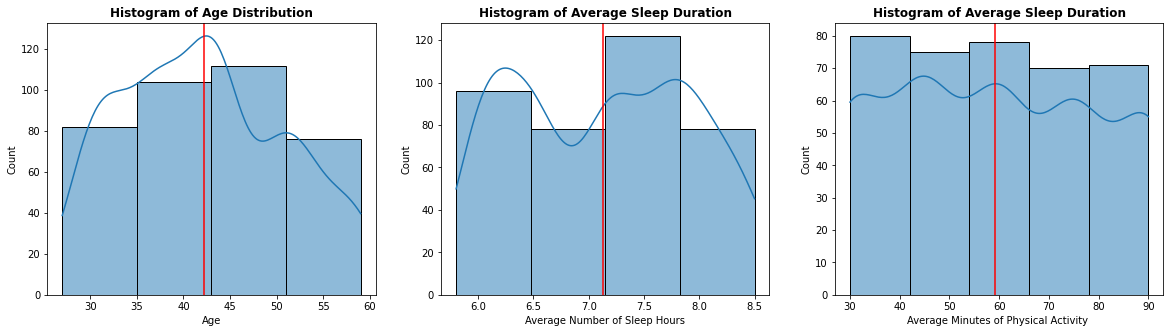

In [24]:
#histogram for distributions - age, avg sleep duration, avg physical activity, stress level, daily steps

plt.figure(figsize=(20, 5))

plt.subplot(1, 3, 1)
sns.histplot(x=sleep_df["age"],bins=4, kde = True)
plt.title("Histogram of Age Distribution", fontweight = 'bold')
plt.axvline(sleep_df['age'].mean(),color = 'r')
plt.xlabel("Age")
plt.ylabel("Count")


plt.subplot(1, 3, 2)
sns.histplot(x=sleep_df["avg_sleep_duration(hrs)"],bins=4, kde = True)
plt.title("Histogram of Average Sleep Duration", fontweight = 'bold')
plt.axvline(sleep_df['avg_sleep_duration(hrs)'].mean(),color = 'r')
plt.xlabel("Average Number of Sleep Hours")
plt.ylabel("Count")


plt.subplot(1, 3, 3)
sns.histplot(x=sleep_df["avg_physical_activity(mins)"],bins=5, kde = True)
plt.title("Histogram of Average Sleep Duration", fontweight = 'bold')
plt.axvline(sleep_df['avg_physical_activity(mins)'].mean(),color = 'r')
plt.xlabel("Average Minutes of Physical Activity ")
plt.ylabel("Count")
plt.show()

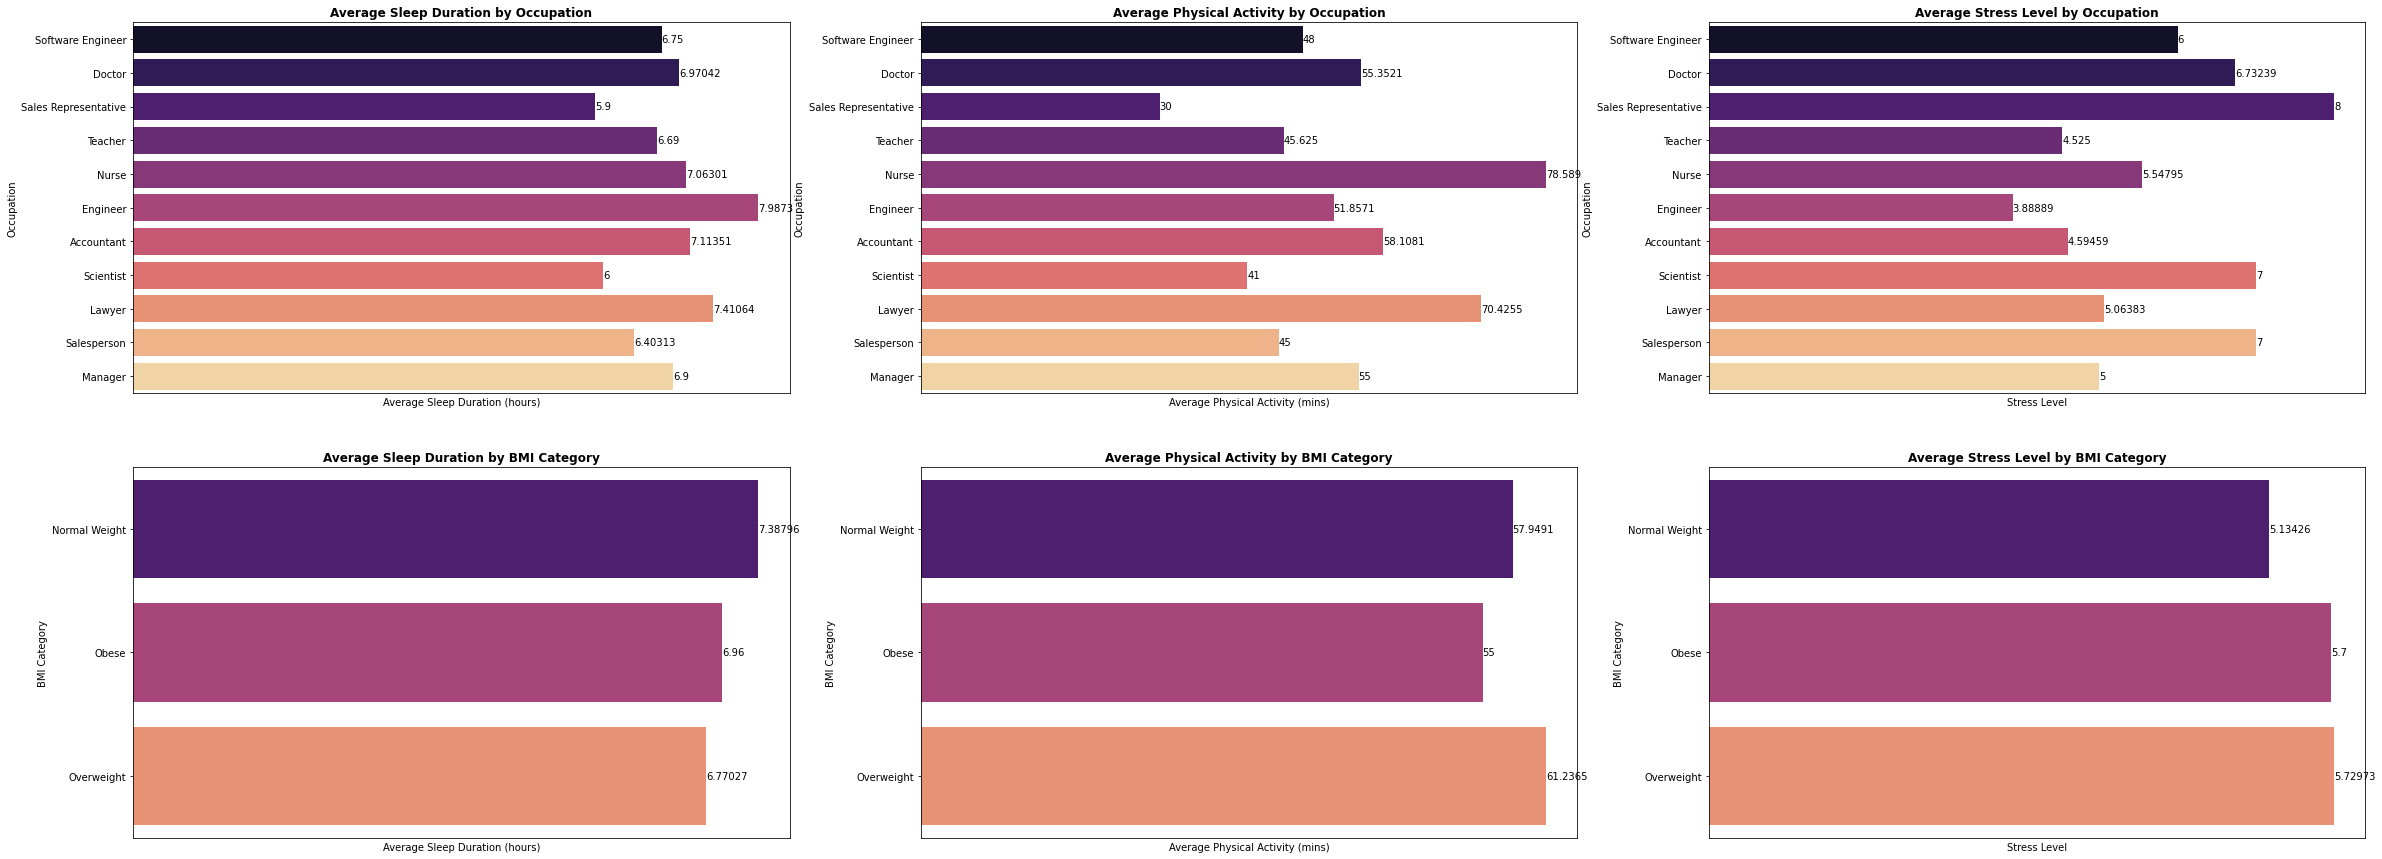

In [25]:
# bar charts

plt.figure(figsize=(40, 15))

# Bar chart for average sleep duration by Occupation
plt.subplot(2,3,1)
sl_bar = sns.barplot(x='avg_sleep_duration(hrs)', y='occupation', data=sleep_df, ci=None, palette = 'magma')
plt.title('Average Sleep Duration by Occupation', fontweight = 'bold')
plt.xlabel('Average Sleep Duration (hours)')
plt.ylabel('Occupation')
sl_bar.bar_label(sl_bar.containers[0])
plt.xticks([])

# Bar chart for average physical activity by Occupation
plt.subplot(2,3,2)
sl_bar = sns.barplot(x='avg_physical_activity(mins)', y='occupation', data=sleep_df, ci=None, palette = 'magma')
plt.title('Average Physical Activity by Occupation', fontweight = 'bold')
plt.xlabel('Average Physical Activity (mins)')
plt.ylabel('Occupation')
sl_bar.bar_label(sl_bar.containers[0])
plt.xticks([])

# Bar chart for average stress level by Occupation
plt.subplot(2,3,3)
bm_bar = sns.barplot(x='stress_level', y='occupation', data=sleep_df, ci=None, palette='magma')
plt.title('Average Stress Level by Occupation', fontweight = 'bold')
plt.xlabel('Stress Level')
plt.ylabel('Occupation')
bm_bar.bar_label(bm_bar.containers[0])
plt.xticks([])

# Bar chart for average sleep duration by BMI category
plt.subplot(2,3,4)
bm_bar = sns.barplot(x='avg_sleep_duration(hrs)', y='bmi_category', data=sleep_df, ci=None, palette='magma')
plt.title('Average Sleep Duration by BMI Category', fontweight = 'bold')
plt.xlabel('Average Sleep Duration (hours)')
plt.ylabel('BMI Category')
bm_bar.bar_label(bm_bar.containers[0])
plt.xticks([])

# Bar chart for average physical activity by BMI category
plt.subplot(2,3,5)
sl_bar = sns.barplot(x='avg_physical_activity(mins)', y='bmi_category', data=sleep_df, ci=None, palette = 'magma')
plt.title('Average Physical Activity by BMI Category', fontweight = 'bold')
plt.xlabel('Average Physical Activity (mins)')
plt.ylabel('BMI Category')
sl_bar.bar_label(sl_bar.containers[0])
plt.xticks([])

# Bar chart for average stress level by BMI category
plt.subplot(2,3,6)
bm_bar = sns.barplot(x='stress_level', y='bmi_category', data=sleep_df, ci=None, palette='magma')
plt.title('Average Stress Level by BMI Category', fontweight = 'bold')
plt.xlabel('Stress Level')
plt.ylabel('BMI Category')
bm_bar.bar_label(bm_bar.containers[0])
plt.xticks([])
plt.show()

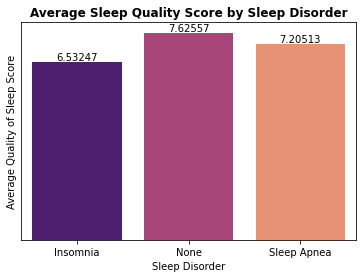

In [26]:
# Bar chart for average sleep quality by sleep disorder
bm_bar = sns.barplot(y='quality_of_sleep', x='sleep_disorder', data=sleep_df, ci=None, palette='magma')
plt.title('Average Sleep Quality Score by Sleep Disorder', fontweight = 'bold')
plt.xlabel('Sleep Disorder')
plt.ylabel('Average Quality of Sleep Score')
bm_bar.bar_label(bm_bar.containers[0])
plt.yticks([])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

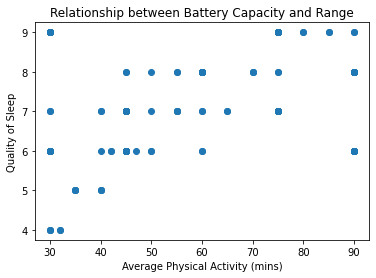

In [27]:
plt.scatter(x=sleep_df['avg_physical_activity(mins)'], y=sleep_df['quality_of_sleep'])
plt.title('Relationship between Battery Capacity and Range')
plt.xlabel('Average Physical Activity (mins)')
plt.ylabel('Quality of Sleep')
plt.show

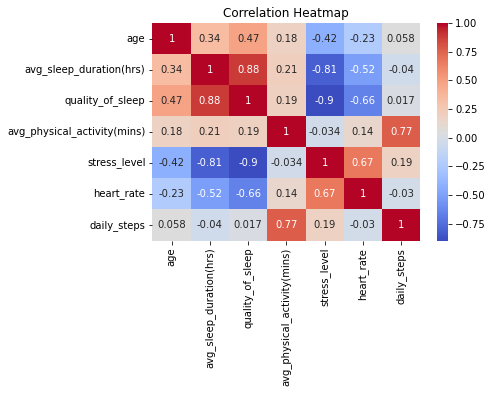

In [28]:
# Correlation heatmap

corr = sleep_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Machine Learning

This section involves training models to predict whether an individual has Insomnia, Sleep Apnea, or no sleeping disorder. 

The columns used for the prediction are: gender, age, quality of sleep, average sleep duration, and daily steps.

As there are thee categories in the target variable(sleep disorder), a classification model will be used. I trained a kneighbors classifier and a decision tree classifier.

The decision tree classifier worked better than the KNeighbors with an accuracy score of 93% compared to 88%.

In [29]:
#importing libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

#storing classifier model in a variable
knn = KNeighborsClassifier(n_neighbors=3)

In [30]:
#checking column info
sleep_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   person_id                    374 non-null    object  
 1   gender                       374 non-null    category
 2   age                          374 non-null    int64   
 3   occupation                   374 non-null    object  
 4   avg_sleep_duration(hrs)      374 non-null    float64 
 5   quality_of_sleep             374 non-null    int64   
 6   avg_physical_activity(mins)  374 non-null    int64   
 7   stress_level                 374 non-null    int64   
 8   bmi_category                 374 non-null    category
 9   blood_pressure               374 non-null    object  
 10  heart_rate                   374 non-null    int64   
 11  daily_steps                  374 non-null    int64   
 12  sleep_disorder               374 non-null    category
 13  bp_ca

In [31]:
#using a label encoder on categorical columns in the dataset

LE=LabelEncoder()
categories = ['gender','sleep_disorder']

for label in categories:
    sleep_df[label]=LE.fit_transform(sleep_df[label])

In [32]:
#Splitting data set into input data and target data

X = sleep_df[['gender','age','quality_of_sleep','daily_steps', 'avg_sleep_duration(hrs)',
              'avg_physical_activity(mins)']]

y = sleep_df[['sleep_disorder']]

In [33]:
#checking unique values in categorical columns
print(X['gender'].unique())
print(y['sleep_disorder'].unique())

[1 0]
[1 2 0]


In [34]:
#splitting data into train set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,test_size = 0.25,random_state = 42)

In [35]:
#training the model
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
#making prediction on test set
y_pred = knn.predict(X_test)

In [37]:
# creating a dataframe for actual values and predicted values
pred_data = pd.DataFrame()
pred_data['y_pred'] = y_pred
pred_data['y_test'] = y_test.values

In [38]:
#viewing first 5 entries
pred_data.head()

y_pred  y_test
0       2       2
1       1       1
2       1       1
3       2       2
4       1       1

In [39]:
#Checking the accuracy score of the model
print('The train score is', knn.score(X_train, y_train)) #Train score
print('The test score is', knn.score(X_test, y_test)) #Test score

The train score is 0.8964285714285715
The test score is 0.8829787234042553


Can I do better than an 88% accuracy score? We'll find out from the decision tree model. 

In [40]:
# Instantiate a DecisionTreeClassifier 'dtr' with a maximum depth of 6
dtr = DecisionTreeClassifier(max_depth=6, random_state=42)

# Fit dtr to the training set
dtr.fit(X_train, y_train)

# Predict test set labels
y_pred2 = dtr.predict(X_test)

In [41]:
#Checking the accuracy score of the model
print("Training set score: {:.3f}".format(dtr.score(X_train, y_train)))
print("Test set score: {:.3f}".format(dtr.score(X_test, y_test)))

Training set score: 0.914
Test set score: 0.936


In [42]:
# creating a dataframe for actual values and predicted values
pred_df = pd.DataFrame()
pred_df['y_pred'] = y_pred2
pred_df['y_test'] = y_test.values

In [48]:
pred_df.head()

y_pred  y_test
0       2       2
1       1       1
2       1       1
3       2       2
4       1       1

### Conclusion

From the above analysis, we can infer that age, physical activity levels, and stress levels are some of the factors that may contribute to sleep disorder diagnosis. Surprisingly, there was no real correlation between the average minutes of physical activity and quality of sleep. 

With more real world data, algorithms can be built to diagnose individuals of sleep disorder based on their relevant qualities. 

